In [6]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

def simulator(r0, f0, r1=0.85, f1=0.35, N=1024):
    x0, x1 = np.zeros(N), np.zeros(N)
    u0, u1 = np.random.randn(N), np.random.randn(N)
    for n in range(N):
        x0[n] = 2*r0*np.cos(2*np.pi*f0) * x0[n-1] - r0**2 * x0[n-2] + u0[n]
        x1[n] = 2*r1*np.cos(2*np.pi*f1) * x1[n-1] - r1**2 * x1[n-2] + u1[n]
    x = 1.0/np.std(x0)*x0 + 1.0/np.std(x1)*x1
    return x

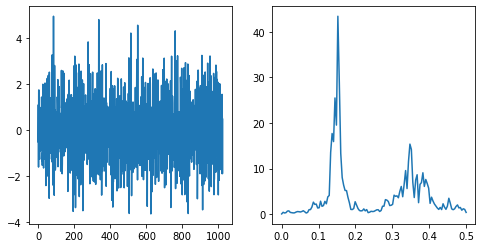

In [7]:
theta_true = [0.95, 0.15]
x_obs = simulator(theta_true[0],theta_true[1])

f,P = welch(x_obs)
    
fig, ax = plt.subplots(figsize=(8,4), ncols=2)
ax[0].plot(x_obs)
ax[1].plot(f,P)
plt.show()

In [26]:
import torch
import torch.distributions as D

prior_r0 = D.Uniform(0,1)
prior_f0 = D.Uniform(0,0.5)

n = 100

list_r0 = prior_r0.sample((n,1))
list_f0 = prior_f0.sample((n,1))
theta = torch.concat([list_r0, list_f0], axis=1)

x = []
for i in range(n):
    r0_i, f0_i = theta[i]
    x_i = simulator(r0_i, f0_i)
    x.append(torch.FloatTensor(x_i))
x = torch.stack(x)[:,:,None]
x.shape

torch.Size([100, 1024, 1])

In [29]:
from hnpe.summary import summary_JRNMM
summary = summary_JRNMM()
s = summary(x)
s[:,:,0].shape

torch.Size([100, 33])

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(s[:,:,0]) 
x_new = pca.transform(s[:,:,0])
x_new.shape

(100, 2)